In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
from DenseNet import DenseNet, BottleNeck, Transition

#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
model = torch.load('./DenseNetmodel.pth', map_location=torch.device('cpu'))

In [4]:
def predict_image_class(image_path, model):
    transform = transforms.Compose([
        transforms.Resize((256, 256)),  # 이미지 크기 조정
        transforms.ToTensor(),  # 이미지를 텐서로 변환
        transforms.Normalize(mean=[0.25, 0.25, 0.25], std=[0.1, 0.1, 0.1])#성수님 코드 내부대로 변경
    ])
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs.data, 1)

    return predicted.item()

In [5]:
import pandas as pd
talmo = pd.read_csv('./scalp_type/탈모concat_df.csv')
talmo['image_path'] = talmo['image_path'].str.replace('./Training', './scalp_type/Training/hairloss')
#talmo['image_path'] = talmo['image_path'].str.replace('.zipfile', '')
talmo['image_path'] = talmo['image_path'].str.replace('./Validation', './scalp_type/Validation/hairloss')
talmo.head()

C:\Users\hmybj\AppData\Local\Temp\ipykernel_26820\3788753098.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  talmo['image_path'] = talmo['image_path'].str.replace('./Training', './scalp_type/Training/hairloss')
C:\Users\hmybj\AppData\Local\Temp\ipykernel_26820\3788753098.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  talmo['image_path'] = talmo['image_path'].str.replace('./Validation', './scalp_type/Validation/hairloss')


,Unnamed: 0,image_id,image_file_name,미세각질,피지과다,모낭사이홍반,모낭홍반농포,비듬,탈모,where,image_path
0,0,0013_A2LEBJJDE00060O_1606550825417_3,0013_A2LEBJJDE00060O_1606550825417_3_TH.jpg,0,0,0,0,0,0,[라벨]탈모_0.양호,./scalp_type/Training/hairloss/[원천]탈모_0.양호.zip...
1,1,0177_A2LEBJJDE00152B_1604650530904_6,0177_A2LEBJJDE00152B_1604650530904_6_BH.jpg,0,0,0,0,0,0,[라벨]탈모_0.양호,./scalp_type/Training/hairloss/[원천]탈모_0.양호.zip...
2,2,0335_A2LEBJJDE00013X_1602916465540_6,0335_A2LEBJJDE00013X_1602916465540_6_BH.jpg,0,0,0,0,0,0,[라벨]탈모_0.양호,./scalp_type/Training/hairloss/[원천]탈모_0.양호.zip...
3,3,0335_A2LEBJJDE000542_1605676381132_4,0335_A2LEBJJDE000542_1605676381132_4_LH.jpg,0,0,0,0,0,0,[라벨]탈모_0.양호,./scalp_type/Training/hairloss/[원천]탈모_0.양호.zip...
4,4,0425_A2LEBJJDE00079P_1605793927978_5,0425_A2LEBJJDE00079P_1605793927978_5_RH.jpg,0,0,0,0,0,0,[라벨]탈모_0.양호,./scalp_type/Training/hairloss/[원천]탈모_0.양호.zip...


In [5]:
talmo.tail()

,Unnamed: 0,image_id,image_file_name,미세각질,피지과다,모낭사이홍반,모낭홍반농포,비듬,탈모,where,image_path
23796,5283,9244_A2LEBJJDE00154W_1607590387532_5,9244_A2LEBJJDE00154W_1607590387532_5_RH.jpg,0,1,0,0,0,3,[라벨]탈모_3.중증,./scalp_type/Validation/hairloss/[원천]탈모_3.중증/9...
23797,5284,9338_A2LEBJJDE00101D_1606742762533_2,9338_A2LEBJJDE00101D_1606742762533_2_TH.jpg,0,2,1,0,1,3,[라벨]탈모_3.중증,./scalp_type/Validation/hairloss/[원천]탈모_3.중증/9...
23798,5285,9527_A2LEBJJDE00110E_1606732870059_3,9527_A2LEBJJDE00110E_1606732870059_3_TH.jpg,0,1,0,0,0,3,[라벨]탈모_3.중증,./scalp_type/Validation/hairloss/[원천]탈모_3.중증/9...
23799,5286,9527_A2LEBJJDE00110E_1606741400034_3,9527_A2LEBJJDE00110E_1606741400034_3_TH.jpg,0,2,1,0,0,3,[라벨]탈모_3.중증,./scalp_type/Validation/hairloss/[원천]탈모_3.중증/9...
23800,5287,9578_A2LEBJJDE00105K_1608350762473_2,9578_A2LEBJJDE00105K_1608350762473_2_TH.jpg,0,0,1,0,0,3,[라벨]탈모_3.중증,./scalp_type/Validation/hairloss/[원천]탈모_3.중증/9...


In [6]:
import pandas as pd

# talmo_df에서 "image_path" 열에 "Test"가 포함된 행을 추출하여 talmo_test_df 생성
talmo_test = talmo[talmo["image_path"].str.contains("Validation")]

talmo_test

,Unnamed: 0,image_id,image_file_name,미세각질,피지과다,모낭사이홍반,모낭홍반농포,비듬,탈모,where,image_path
18513,0,6995_A2LEBJJDE00104R_1606040549648_5,6995_A2LEBJJDE00104R_1606040549648_5_RH.jpg,0,0,0,0,0,0,[라벨]탈모_0.양호,./scalp_type/Validation/hairloss/[원천]탈모_0.양호/6...
18514,1,7027_A2LEBJJDE001117_1602922543531_2,7027_A2LEBJJDE001117_1602922543531_2_TH.jpg,0,0,0,0,0,0,[라벨]탈모_0.양호,./scalp_type/Validation/hairloss/[원천]탈모_0.양호/7...
18515,2,7027_A2LEBJJDE001117_1602988151264_3,7027_A2LEBJJDE001117_1602988151264_3_TH.jpg,0,0,0,0,0,0,[라벨]탈모_0.양호,./scalp_type/Validation/hairloss/[원천]탈모_0.양호/7...
18516,3,7027_A2LEBJJDE001117_1603609341639_3,7027_A2LEBJJDE001117_1603609341639_3_TH.jpg,0,0,0,0,0,0,[라벨]탈모_0.양호,./scalp_type/Validation/hairloss/[원천]탈모_0.양호/7...
18517,4,7027_A2LEBJJDE001117_1603949553519_3,7027_A2LEBJJDE001117_1603949553519_3_TH.jpg,0,0,0,0,0,0,[라벨]탈모_0.양호,./scalp_type/Validation/hairloss/[원천]탈모_0.양호/7...
...,...,...,...,...,...,...,...,...,...,...,...
23796,5283,9244_A2LEBJJDE00154W_1607590387532_5,9244_A2LEBJJDE00154W_1607590387532_5_RH.jpg,0,1,0,0,0,3,[라벨]탈모_3.중증,./scalp_type/Validation/hairloss/[원천]탈모_3.중증/9...
23797,5284,9338_A2LEBJJDE00101D_1606742762533_2,9338_A2LEBJJDE00101D_1606742762533_2_TH.jpg,0,2,1,0,1,3,[라벨]탈모_3.중증,./scalp_type/Validation/hairloss/[원천]탈모_3.중증/9...
23798,5285,9527_A2LEBJJDE00110E_1606732870059_3,9527_A2LEBJJDE00110E_1606732870059_3_TH.jpg,0,1,0,0,0,3,[라벨]탈모_3.중증,./scalp_type/Validation/hairloss/[원천]탈모_3.중증/9...
23799,5286,9527_A2LEBJJDE00110E_1606741400034_3,9527_A2LEBJJDE00110E_1606741400034_3_TH.jpg,0,2,1,0,0,3,[라벨]탈모_3.중증,./scalp_type/Validation/hairloss/[원천]탈모_3.중증/9...


In [53]:
# 이미지 하나를 랜덤으로 선택
import random

path = random.choice(talmo['image_path'])
path

'./scalp_type/Training/hairloss/[원천]탈모_1.경증.zipfile/7939_A2LEBJJDE00023R_1602755355066_3_TH.jpg'

In [54]:
selected_talmo_value = talmo.loc[talmo['image_path'] == path, '탈모'].values[0]

In [55]:
# pred_class는 모델이 예측한 증상정도 0,1,2,3
pred_class = predict_image_class(path, model)

In [56]:
print(pred_class)

2


---

- 모델 성능 시각화
- confusion matrix

In [ ]:
pred_class = []
ans_class = []
wrong = {}

for i in range(len(talmo_test)):
    path = talmo_test.iloc[i]['image_path']
    ans = talmo_test.loc[talmo_test['image_path'] == path, '탈모'].values[0]
    pred = predict_image_class(path, model)

    if ans != pred:
        print(ans, pred)
        wrong[path] = {'ans': ans, 'pred': pred}

    ans_class.append(ans)
    pred_class.append(pred)

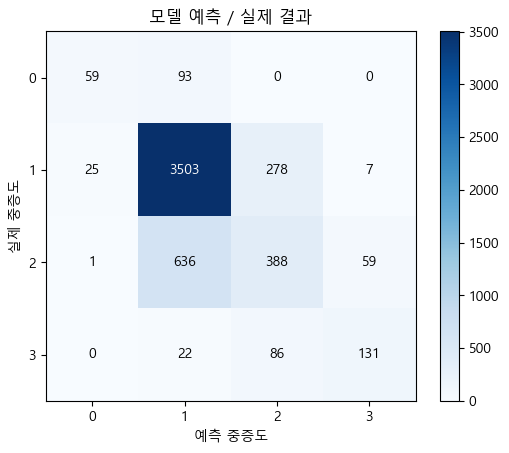

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rc('font', family='Malgun Gothic')

# 오차 행렬 생성
cm = confusion_matrix(ans_class, pred_class)

# 히트맵 시각화
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# 컬러바 설정
cbar = ax.figure.colorbar(im, ax=ax)

# 축 설정
classes = np.unique(ans_class)
tick_marks = np.arange(len(classes))
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)

# 축 라벨 및 제목 설정
ax.set_xlabel('예측 중증도')
ax.set_ylabel('실제 중증도')
ax.set_title('모델 예측 / 실제 결과')

# 텍스트 주석 추가
thresh = cm.max() / 2.0
for i in range(len(classes)):
    for j in range(len(classes)):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.show()


In [9]:
len(wrong)

1207

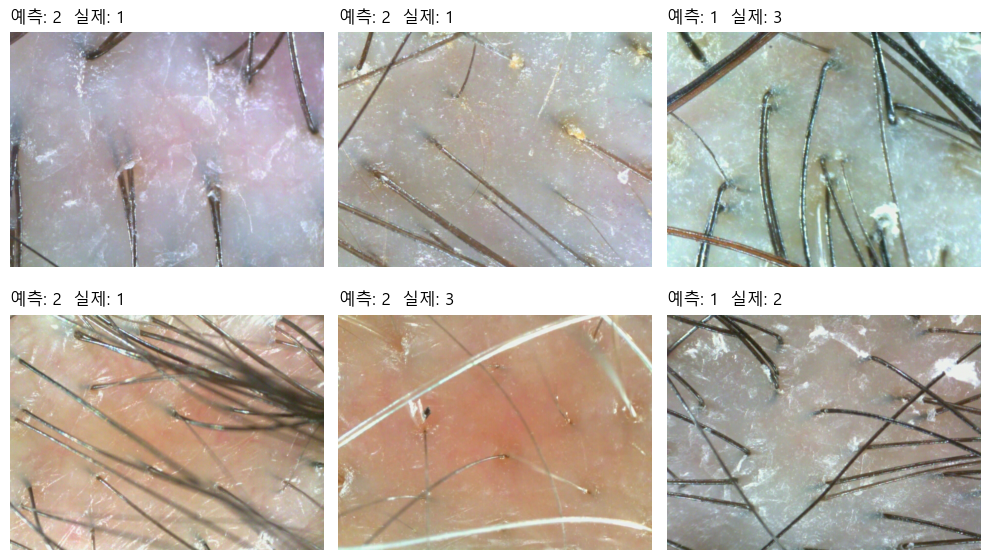

In [80]:
import random
import matplotlib.pyplot as plt

# wrong 딕셔너리에서 무작위로 6개의 키 선택
random_keys = random.sample(list(wrong.keys()), 6)

# 2x3 서브플롯 생성
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# 서브플롯에 이미지와 정보 표시
for i, key in enumerate(random_keys):
    # 이미지 경로에 접근
    image_path = key

    # 예측값과 실제값 가져오기
    pred = wrong[key]['pred']
    ans = wrong[key]['ans']

    # 이미지 그리기
    img = plt.imread(image_path)
    axes[i // 3, i % 3].imshow(img)
    axes[i // 3, i % 3].axis('off')

    # 정보 표시
    axes[i // 3, i % 3].text(0, -20, f'예측: {pred}  실제: {ans}', fontsize=12)

plt.tight_layout()
plt.show()

모델이 잘못 예측한 이미지 몇개를 랜덤으로 확인해본 결과 육안 상 구분이 어려운 이미지들의 예측을 실패하였다